# Using PCHIC data to validate SCARP regulatory score

In [1]:
from help_func import *
pd.set_option('display.max_columns', 500)

# Data preprocessing

## import ATAC data

In [2]:
ATAC_data = sc.read_h5ad('./Processed data/10X_pbmc_ATAC_celltype_filtered.h5ad')

In [3]:
ATAC_peaks = ATAC_data.var
ATAC_peaks

,peak,gene,distance,peak_type,chr,from,to,n_cells
chr1:10109-10357,chr1:10109-10357,MIR1302-2HG,-19197,distal,chr1,10109,10357,63
chr1:180730-181630,chr1:180730-181630,AL627309.5,-6869,distal,chr1,180730,181630,133
chr1:191491-191736,chr1:191491-191736,AL627309.5,-17630,distal,chr1,191491,191736,51
chr1:267816-268196,chr1:267816-268196,AP006222.2,962,distal,chr1,267816,268196,101
chr1:586028-586373,chr1:586028-586373,AC114498.1,-1256,distal,chr1,586028,586373,72
...,...,...,...,...,...,...,...,...
chrX:155966975-155967181,chrX:155966975-155967181,IL9R,-30400,distal,chrX,155966975,155967181,49
chrX:155997360-155997882,chrX:155997360-155997882,IL9R,0,promoter,chrX,155997360,155997882,130
chrX:156030027-156030149,chrX:156030027-156030149,WASIR1,-13191,distal,chrX,156030027,156030149,7
chrY:11332988-11334144,chrY:11332988-11334144,NaN,NaN,intergenic,chrY,11332988,11334144,52


In [4]:
ATAC_promoters = ATAC_peaks[ATAC_peaks['peak_type'] == 'promoter'][['peak', 'chr', 'from', 'to']]
ATAC_promoters

,peak,chr,from,to
chr1:777634-779926,chr1:777634-779926,chr1,777634,779926
chr1:816881-817647,chr1:816881-817647,chr1,816881,817647
chr1:869449-870383,chr1:869449-870383,chr1,869449,870383
chr1:903617-907386,chr1:903617-907386,chr1,903617,907386
chr1:920493-926443,chr1:920493-926443,chr1,920493,926443
...,...,...,...,...
chrX:155262922-155264853,chrX:155262922-155264853,chrX,155262922,155264853
chrX:155611306-155613309,chrX:155611306-155613309,chrX,155611306,155613309
chrX:155767383-155767733,chrX:155767383-155767733,chrX,155767383,155767733
chrX:155880572-155882091,chrX:155880572-155882091,chrX,155880572,155882091


## import PCHIC data

In [5]:
# pcHiC_data = pd.read_csv('./Raw data/ActivePromoterEnhancerLinks.tsv', sep='\t')
# pcHiC_data

In [6]:
used_cts = ["Mon", "nCD4", "tCD4", "aCD4", "naCD4", "nCD8", "tCD8", "nB", "tB"]
pcHiC_data = pd.read_table(
    "./Raw data/PCHiC_peak_matrix_cutoff5.tsv",
    usecols=["baitChr", "baitStart", "baitEnd", "baitID", 'baitName',
             "oeChr", "oeStart", "oeEnd", "oeID", 'oeName'] + used_cts, 
    dtype={"baitID": str, "oeID": str, 'baitChr': str, 'oeChr': str}
)
pcHiC_data = pcHiC_data.loc[pcHiC_data.loc[:, used_cts].to_numpy().max(axis=1) > 5, :]
pcHiC_data = pcHiC_data[["baitChr", "baitStart", "baitEnd", "baitID", 'baitName',
                         "oeChr", "oeStart", "oeEnd", "oeID", 'oeName']]
pcHiC_data.columns = ["baitChr", "baitSt", "baitEnd", "baitID", 'baitName',
                      "oeChr", "oeSt", "oeEnd", "oeID", 'oeName']

In [7]:
help_list = list(pcHiC_data['baitChr'])
pcHiC_data['baitChr'] = ['chr' + str(help_list[i])
                         for i in range(pcHiC_data.shape[0])]

In [8]:
help_list = list(pcHiC_data['oeChr'])
pcHiC_data['oeChr'] = ['chr' + str(help_list[i])
                       for i in range(pcHiC_data.shape[0])]

In [9]:
pcHiC_data

,baitChr,baitSt,baitEnd,baitID,baitName,oeChr,oeSt,oeEnd,oeID,oeName
0,chr1,831895,848168,218,RP11-54O7.16;RP11-54O7.1,chr1,850619,874081,220,AL645608.1;RP11-54O7.3;SAMD11
2,chr1,831895,848168,218,RP11-54O7.16;RP11-54O7.1,chr1,889424,903640,223,KLHL17;NOC2L;PLEKHN1
3,chr1,831895,848168,218,RP11-54O7.16;RP11-54O7.1,chr1,903641,927394,224,C1orf170;PLEKHN1
8,chr1,850619,874081,220,AL645608.1;RP11-54O7.3;SAMD11,chr1,831895,848168,218,RP11-54O7.16;RP11-54O7.1
11,chr1,889424,903640,223,KLHL17;NOC2L;PLEKHN1,chr1,1206874,1212438,254,RP5-902P8.10;UBE2J2
...,...,...,...,...,...,...,...,...,...,...
728832,chrY,22916750,22918123,835334,RPS4Y2,chrY,23424530,23428951,835532,.
728833,chrY,22916750,22918123,835334,RPS4Y2,chrY,23428952,23431276,835533,.
728834,chrY,22916750,22918123,835334,RPS4Y2,chrY,23431277,23434441,835534,.
728835,chrY,22916750,22918123,835334,RPS4Y2,chrY,23434442,23445346,835535,.


In [10]:
pcHiC_promoters = pcHiC_data.drop_duplicates(subset=['baitID'], 
                                             keep='first', 
                                             inplace=False, 
                                             ignore_index=False)[
    ['baitChr', 'baitSt', 'baitEnd', 'baitID', 'baitName']]
pcHiC_promoters.index = pcHiC_promoters['baitID']
pcHiC_promoters

,baitChr,baitSt,baitEnd,baitID,baitName
baitID,,,,,
218,chr1,831895,848168,218,RP11-54O7.16;RP11-54O7.1
220,chr1,850619,874081,220,AL645608.1;RP11-54O7.3;SAMD11
223,chr1,889424,903640,223,KLHL17;NOC2L;PLEKHN1
224,chr1,903641,927394,224,C1orf170;PLEKHN1
225,chr1,927395,936954,225,HES4;RP11-54O7.17
...,...,...,...,...,...
835030,chrY,21749356,21753274,835030,TXLNG2P
835094,chrY,21905989,21911308,835094,KDM5D
835266,chrY,22732050,22743996,835266,EIF1AY


In [11]:
pcHiC_oe = pcHiC_data.drop_duplicates(subset=['oeID'], 
                                      keep='first', 
                                      inplace=False, 
                                      ignore_index=False)[
    ['oeChr', 'oeSt', 'oeEnd', 'oeID', 'oeName']]
pcHiC_oe.index = pcHiC_oe['oeID']
pcHiC_oe

,oeChr,oeSt,oeEnd,oeID,oeName
oeID,,,,,
220,chr1,850619,874081,220,AL645608.1;RP11-54O7.3;SAMD11
223,chr1,889424,903640,223,KLHL17;NOC2L;PLEKHN1
224,chr1,903641,927394,224,C1orf170;PLEKHN1
218,chr1,831895,848168,218,RP11-54O7.16;RP11-54O7.1
254,chr1,1206874,1212438,254,RP5-902P8.10;UBE2J2
...,...,...,...,...,...
835534,chrY,23431277,23434441,835534,.
835535,chrY,23434442,23445346,835535,.
835537,chrY,23447715,23451895,835537,.


## Aligning promoters of scATAC and baits of pcHIC

In [12]:
ATAC_promoters_append_PCHIC_promoter = pd.DataFrame()

for temp_atac_pro in ATAC_promoters.index:
    # search in same chromosome
    temp_pchic_pro_df = pcHiC_promoters[pcHiC_promoters['baitChr']
                                        == ATAC_promoters['chr'].loc[temp_atac_pro]]

    res_list = []
    for temp_pchic_pro in temp_pchic_pro_df.index:
        res = is_pchic_validated(int(ATAC_promoters['from'].loc[temp_atac_pro]),
                                 int(ATAC_promoters['to'].loc[temp_atac_pro]),
                                 int(temp_pchic_pro_df['baitSt'].loc[temp_pchic_pro]),
                                 int(temp_pchic_pro_df['baitEnd'].loc[temp_pchic_pro]),
                                 thre=0.5)
        res_list.append(res)
        # have corresponding promoter
        if res == 1:
            ATAC_promoters_append_PCHIC_promoter = ATAC_promoters_append_PCHIC_promoter.append(
                temp_pchic_pro_df[['baitChr', 'baitSt', 'baitEnd', 'baitID']].loc[temp_pchic_pro])
            break

    # haven't corresponding promoter
    if sum(res_list) == 0:
        ATAC_promoters_append_PCHIC_promoter = ATAC_promoters_append_PCHIC_promoter.append(
            pd.DataFrame(np.zeros((1, 4)), columns=['baitChr', 'baitSt', 'baitEnd', 'baitID']))

ATAC_promoters_append_PCHIC_promoter.index = ATAC_promoters.index
ATAC_promoters = ATAC_promoters.join(ATAC_promoters_append_PCHIC_promoter)

## Filtering pcHIC data based on aligned promoters

In [13]:
ATAC_promoters = ATAC_promoters[ATAC_promoters['baitID'] != 0]
pcHiC_promoters = pcHiC_promoters.loc[ATAC_promoters['baitID']]
pcHiC_data = pcHiC_data[pcHiC_data['baitID'].isin(ATAC_promoters['baitID'])]

In [14]:
pcHiC_data.insert(pcHiC_data.shape[1], 'value', np.ones(pcHiC_data.shape[0]))
PCHIC_judge_mat = pd.pivot(pcHiC_data, index='baitID',
                           columns='oeID', values='value')
PCHIC_judge_mat = PCHIC_judge_mat.fillna(0)
PCHIC_judge_mat = PCHIC_judge_mat.loc[ATAC_promoters['baitID']]
PCHIC_judge_mat.shape

(1526, 22357)

In [15]:
pcHiC_oe = pcHiC_oe[pcHiC_oe['oeID'].isin(PCHIC_judge_mat.columns)]
pcHiC_oe.index = pcHiC_oe['oeID']
pcHiC_oe

,oeChr,oeSt,oeEnd,oeID,oeName
oeID,,,,,
220,chr1,850619,874081,220,AL645608.1;RP11-54O7.3;SAMD11
223,chr1,889424,903640,223,KLHL17;NOC2L;PLEKHN1
224,chr1,903641,927394,224,C1orf170;PLEKHN1
218,chr1,831895,848168,218,RP11-54O7.16;RP11-54O7.1
254,chr1,1206874,1212438,254,RP5-902P8.10;UBE2J2
...,...,...,...,...,...
829738,chrX,153401767,153408740,829738,.
829703,chrX,153254507,153265862,829703,.
829714,chrX,153305325,153305803,829714,.


## Aligning peaks of scATAC and oes of pcHIC

In [16]:
ATAC_peaks_append_PCHIC_oe = pd.DataFrame()

for temp_peak in ATAC_peaks.index:
    # search in same chromosome
    temp_PCHIC_oe_df = pcHiC_oe[pcHiC_oe['oeChr']
                                == ATAC_peaks['chr'].loc[temp_peak]]

    res_list = []
    for temp_oe in temp_PCHIC_oe_df.index:
        res = is_pchic_validated(int(ATAC_peaks['from'].loc[temp_peak]),
                                 int(ATAC_peaks['to'].loc[temp_peak]),
                                 int(temp_PCHIC_oe_df['oeSt'].loc[temp_oe]),
                                 int(temp_PCHIC_oe_df['oeEnd'].loc[temp_oe]),
                                 thre=0.5)
        res_list.append(res)
        # have corresponding peak
        if res == 1:
            ATAC_peaks_append_PCHIC_oe = ATAC_peaks_append_PCHIC_oe.append(
                pcHiC_oe[['oeChr', 'oeSt', 'oeEnd', 'oeID']].loc[temp_oe])
            break

    # haven't corresponding peak
    if sum(res_list) == 0:
        ATAC_peaks_append_PCHIC_oe = ATAC_peaks_append_PCHIC_oe.append(
            pd.DataFrame(np.zeros((1, 4)), columns=['oeChr', 'oeSt', 'oeEnd', 'oeID']))

In [17]:
ATAC_peaks_append_PCHIC_oe.index = ATAC_peaks.index
ATAC_peaks = ATAC_peaks.join(ATAC_peaks_append_PCHIC_oe)

## Filtering peaks validated by pcHIC

In [18]:
ATAC_peaks = ATAC_peaks[ATAC_peaks['oeID'] != 0]
pcHiC_oe = pcHiC_oe.loc[ATAC_peaks['oeID']]
pcHiC_data = pcHiC_data[pcHiC_data['oeID'].isin(ATAC_peaks['oeID'])]

In [19]:
PCHIC_judge_mat = PCHIC_judge_mat[ATAC_peaks['oeID']]
PCHIC_judge_mat.shape

(1526, 7977)

# SCARP regulatory scores

## import peaks embedding of SCARP and compute cos similarity

In [20]:
SCARP_peaks_embedding = pd.read_csv(
    './Results/10X_pbmc_ATAC_celltype_filtered_SCARP_Peaks_feature.csv', index_col=0)
print(SCARP_peaks_embedding.shape)
SCARP_peaks_embedding.head(5)

(105948, 20)


,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20
chr1:10109-10357,-0.895662,-0.189149,0.050511,-0.219760,-0.067034,-0.133182,0.118595,0.119604,0.002716,0.123596,0.003540,0.060287,0.101534,0.036376,-0.022708,0.022908,-0.011960,0.134079,-0.104109,-0.001783
chr1:180730-181630,-0.943863,-0.130642,0.064693,-0.152157,-0.015886,-0.040574,0.078263,0.053435,-0.037596,0.084349,0.032270,0.075270,-0.063726,0.038250,-0.007745,-0.055982,0.132272,0.065717,-0.029440,0.084876
chr1:191491-191736,-0.879686,0.235381,0.119935,-0.081076,0.180479,-0.014265,0.051440,0.164888,-0.027129,0.150119,-0.097773,-0.028767,-0.185541,0.092063,-0.016416,-0.049628,-0.018598,-0.010948,0.038498,0.077071
chr1:267816-268196,-0.936410,0.271488,0.108118,0.070956,0.091408,-0.044138,0.047668,0.058683,0.007316,0.059389,0.008080,-0.014551,0.006542,0.023313,-0.021587,0.075860,-0.028838,0.061017,0.038226,0.002440
chr1:586028-586373,-0.933403,0.053968,0.077419,0.048734,0.151406,-0.013109,0.043836,0.077766,-0.005658,-0.019308,0.187705,-0.012657,0.056064,-0.077447,0.043031,0.003266,-0.074587,-0.141059,-0.085624,-0.082579


In [21]:
original_peaks_embedding = pd.DataFrame(np.array(ATAC_data.X.todense()).T,
                                        index=ATAC_data.var.index)
print(original_peaks_embedding.shape)
original_peaks_embedding.head(5)

(105948, 8794)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,8544,8545,8546,8547,8548,8549,8550,8551,8552,8553,8554,8555,8556,8557,8558,8559,8560,8561,8562,8563,8564,8565,8566,8567,8568,8569,8570,8571,8572,8573,8574,8575,8576,8577,8578,8579,8580,8581,8582,8583,8584,8585,8586,8587,8588,8589,8590,8591,8592,8593,8594,8595,8596,8597,8598,8599,8600,8601,8602,8603,8604,8605,8606,8607,8608,8609,8610,8611,8612,8613,8614,8615,8616,8617,8618,8619,8620,8621,8622,8623,8624,8625,8626,8627,8628,8629,8630,8631,8632,8633,8634,8635,8636,8637,8638,8639,8640,8641,8642,8643,8644,8645,8646,8647,8648,8649,8650,8651,8652,8653,8654,8655,8656,8657,8658,8659,8660,8661,8662,8663,8664,8665,8666,8667,8668,8669,8670,8671,8672,8673,8674,8675,8676,8677,8678,8679,8680,8681,8682,8683,8684,8685,8686,8687,8688,8689,8690,8691,8692,8693,8694,8695,8696,8697,8698,8699,8700,8701,8702,8703,8704,8705,8706,8707,8708,8709,8710,8711,8712,8713,8714,8715,8716,8717,8718,8719,8720,8721,8722,8723,8724,8725,8726,8727,8728,8729,8730,8731,8732,8733,8734,8735,8736,8737,8738,8739,8740,8741,8742,8743,8744,8745,8746,8747,8748,8749,8750,8751,8752,8753,8754,8755,8756,8757,8758,8759,8760,8761,8762,8763,8764,8765,8766,8767,8768,8769,8770,8771,8772,8773,8774,8775,8776,8777,8778,8779,8780,8781,8782,8783,8784,8785,8786,8787,8788,8789,8790,8791,8792,8793
chr1:10109-10357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [22]:
cisTopic_peaks_embedding = pd.read_csv(
    './cisTOPIC/peak_embedding_cisTOPIC.txt', index_col=0).T
print(cisTopic_peaks_embedding.shape)
cisTopic_peaks_embedding.head(5)

(105948, 9)


,1,2,3,4,5,6,7,8,9
chr1:10109-10357,0.009041,0.031752,0.033034,0.029304,0.028404,0.04747,0.027154,0.029107,0.031472
chr1:180730-181630,0.009041,0.032499,0.033022,0.035849,0.028359,0.04747,0.027154,0.029107,0.031472
chr1:191491-191736,0.009041,0.029889,0.033034,0.028692,0.028404,0.04747,0.027753,0.029107,0.031472
chr1:267816-268196,0.009041,0.029903,0.033034,0.027708,0.028351,0.04747,0.029010,0.032877,0.031440
chr1:586028-586373,0.009041,0.029903,0.033034,0.032305,0.028404,0.04743,0.027264,0.029107,0.031472


In [23]:
scAND_peaks_embedding = pd.read_csv(
    './scAND/scAND_peak_feature.csv', index_col=0)
print(scAND_peaks_embedding.shape)
scAND_peaks_embedding.head(5)

(105948, 10)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
chr1:10109-10357,0.796171,0.177195,0.226707,-0.115721,0.063589,0.330634,0.052354,0.284198,0.100573,0.250878
chr1:180730-181630,0.889520,0.128492,0.253288,-0.083914,0.088594,0.241350,0.072941,0.207454,0.027511,0.076388
chr1:191491-191736,0.814686,-0.256834,0.231980,0.167731,0.168870,0.127431,0.139034,0.109534,-0.334879,-0.012124
chr1:267816-268196,0.855095,-0.286624,0.243486,0.187186,0.147334,-0.114934,0.121303,-0.098792,-0.170990,0.060875
chr1:586028-586373,0.898030,-0.069339,0.255712,0.045283,0.111820,-0.085990,0.092063,-0.073913,-0.295195,-0.017853


## correlation of :    promoter v.s. validated peak

In [24]:
L2_row = np.linalg.norm(
    SCARP_peaks_embedding.loc[ATAC_promoters.index], axis=1).reshape(-1, 1)
L2_col = np.linalg.norm(
    SCARP_peaks_embedding.loc[ATAC_peaks.index], axis=1).reshape(-1, 1)

SCARP_promoter_peak_cor = SCARP_peaks_embedding.loc[ATAC_promoters.index].dot(
    SCARP_peaks_embedding.loc[ATAC_peaks.index].T)/L2_row.dot(L2_col.T)
SCARP_promoter_peak_cor = pd.DataFrame(SCARP_promoter_peak_cor,
                                       index=ATAC_promoters.index,
                                       columns=ATAC_peaks.index)
SCARP_promoter_peak_cor.shape

(1526, 7977)

In [25]:
L2_row = np.linalg.norm(
    original_peaks_embedding.loc[ATAC_promoters.index], axis=1).reshape(-1, 1)
L2_col = np.linalg.norm(
    original_peaks_embedding.loc[ATAC_peaks.index], axis=1).reshape(-1, 1)

original_promoter_peak_cor = original_peaks_embedding.loc[ATAC_promoters.index].dot(
    original_peaks_embedding.loc[ATAC_peaks.index].T)/L2_row.dot(L2_col.T)
original_promoter_peak_cor = pd.DataFrame(original_promoter_peak_cor,
                                          index=ATAC_promoters.index,
                                          columns=ATAC_peaks.index)
original_promoter_peak_cor.shape

(1526, 7977)

In [26]:
L2_row = np.linalg.norm(
    cisTopic_peaks_embedding.loc[ATAC_promoters.index], axis=1).reshape(-1, 1)
L2_col = np.linalg.norm(
    cisTopic_peaks_embedding.loc[ATAC_peaks.index], axis=1).reshape(-1, 1)

cisTopic_promoter_peak_cor = cisTopic_peaks_embedding.loc[ATAC_promoters.index].dot(
    cisTopic_peaks_embedding.loc[ATAC_peaks.index].T)/L2_row.dot(L2_col.T)
cisTopic_promoter_peak_cor = pd.DataFrame(cisTopic_promoter_peak_cor,
                                          index=ATAC_promoters.index,
                                          columns=ATAC_peaks.index)
cisTopic_promoter_peak_cor.shape

(1526, 7977)

In [27]:
L2_row = np.linalg.norm(
    scAND_peaks_embedding.loc[ATAC_promoters.index], axis=1).reshape(-1, 1)
L2_col = np.linalg.norm(
    scAND_peaks_embedding.loc[ATAC_peaks.index], axis=1).reshape(-1, 1)

scAND_promoter_peak_cor = scAND_peaks_embedding.loc[ATAC_promoters.index].dot(
    scAND_peaks_embedding.loc[ATAC_peaks.index].T)/L2_row.dot(L2_col.T)
scAND_promoter_peak_cor = pd.DataFrame(scAND_promoter_peak_cor,
                                       index=ATAC_promoters.index,
                                       columns=ATAC_peaks.index)
scAND_promoter_peak_cor.shape

(1526, 7977)

## correlation of :    promoter v.s. other peak

In [28]:
L2_row = np.linalg.norm(
    SCARP_peaks_embedding.loc[ATAC_promoters.index], axis=1).reshape(-1, 1)
L2_col = np.linalg.norm(SCARP_peaks_embedding.loc[ATAC_data.var.drop(
    ATAC_peaks.index).index], axis=1).reshape(-1, 1)

SCARP_promoter_other_peak_cor = SCARP_peaks_embedding.loc[ATAC_promoters.index].dot(
    SCARP_peaks_embedding.loc[ATAC_data.var.drop(ATAC_peaks.index).index].T)/L2_row.dot(L2_col.T)
SCARP_promoter_other_peak_cor = pd.DataFrame(SCARP_promoter_other_peak_cor,
                                             index=ATAC_promoters.index,
                                             columns=ATAC_data.var.drop(ATAC_peaks.index).index)
SCARP_promoter_other_peak_cor.shape

(1526, 97971)

In [29]:
L2_row = np.linalg.norm(
    original_peaks_embedding.loc[ATAC_promoters.index], axis=1).reshape(-1, 1)
L2_col = np.linalg.norm(original_peaks_embedding.loc[ATAC_data.var.drop(
    ATAC_peaks.index).index], axis=1).reshape(-1, 1)

original_promoter_other_peak_cor = original_peaks_embedding.loc[ATAC_promoters.index].dot(
    original_peaks_embedding.loc[ATAC_data.var.drop(ATAC_peaks.index).index].T)/L2_row.dot(L2_col.T)
original_promoter_other_peak_cor = pd.DataFrame(original_promoter_other_peak_cor,
                                                index=ATAC_promoters.index,
                                                columns=ATAC_data.var.drop(ATAC_peaks.index).index)
original_promoter_other_peak_cor.shape

(1526, 97971)

In [30]:
L2_row = np.linalg.norm(
    cisTopic_peaks_embedding.loc[ATAC_promoters.index], axis=1).reshape(-1, 1)
L2_col = np.linalg.norm(cisTopic_peaks_embedding.loc[ATAC_data.var.drop(
    ATAC_peaks.index).index], axis=1).reshape(-1, 1)

cisTopic_promoter_other_peak_cor = cisTopic_peaks_embedding.loc[ATAC_promoters.index].dot(
    cisTopic_peaks_embedding.loc[ATAC_data.var.drop(ATAC_peaks.index).index].T)/L2_row.dot(L2_col.T)
cisTopic_promoter_other_peak_cor = pd.DataFrame(cisTopic_promoter_other_peak_cor,
                                                index=ATAC_promoters.index,
                                                columns=ATAC_data.var.drop(ATAC_peaks.index).index)
cisTopic_promoter_other_peak_cor.shape

(1526, 97971)

In [31]:
L2_row = np.linalg.norm(
    scAND_peaks_embedding.loc[ATAC_promoters.index], axis=1).reshape(-1, 1)
L2_col = np.linalg.norm(scAND_peaks_embedding.loc[ATAC_data.var.drop(
    ATAC_peaks.index).index], axis=1).reshape(-1, 1)

scAND_promoter_other_peak_cor = scAND_peaks_embedding.loc[ATAC_promoters.index].dot(
    scAND_peaks_embedding.loc[ATAC_data.var.drop(ATAC_peaks.index).index].T)/L2_row.dot(L2_col.T)
scAND_promoter_other_peak_cor = pd.DataFrame(scAND_promoter_other_peak_cor,
                                             index=ATAC_promoters.index,
                                             columns=ATAC_data.var.drop(ATAC_peaks.index).index)
scAND_promoter_other_peak_cor.shape

(1526, 97971)

# Plot AUROC

In [32]:
promoter_peak_cor_3col_SCARP = unpivot(SCARP_promoter_peak_cor)
promoter_peak_cor_3col_original = unpivot(original_promoter_peak_cor)
promoter_peak_cor_3col_cisTopic = unpivot(cisTopic_promoter_peak_cor)
promoter_peak_cor_3col_scAND = unpivot(scAND_promoter_peak_cor)

PCHIC_judge_3col = unpivot(PCHIC_judge_mat)

promoter_other_peak_cor_3col_SCARP = unpivot(SCARP_promoter_other_peak_cor)
promoter_other_peak_cor_3col_original = unpivot(original_promoter_other_peak_cor)
promoter_other_peak_cor_3col_cisTopic = unpivot(cisTopic_promoter_other_peak_cor)
promoter_other_peak_cor_3col_scAND = unpivot(scAND_promoter_other_peak_cor)

In [33]:
plot_data_promoter_peak = promoter_peak_cor_3col_SCARP.copy()
plot_data_promoter_peak.columns = ['Promoters','Peaks','SCARP regulatory score']
plot_data_promoter_peak['original regulatory score'] = promoter_peak_cor_3col_original['Regulatory score']
plot_data_promoter_peak['cisTopic regulatory score'] = promoter_peak_cor_3col_cisTopic['Regulatory score']
plot_data_promoter_peak['scAND regulatory score'] = promoter_peak_cor_3col_scAND['Regulatory score']

plot_data_promoter_peak['pcHi-C'] = PCHIC_judge_3col['Regulatory score']
plot_data_promoter_peak['pcHi-C'] = plot_data_promoter_peak['pcHi-C'].astype(int)

In [34]:
plot_data_promoter_all_peak = promoter_peak_cor_3col_SCARP.append(
    promoter_other_peak_cor_3col_SCARP)
plot_data_promoter_all_peak.columns = ['Promoters','Peaks','SCARP regulatory score']
plot_data_promoter_all_peak['original regulatory score'] = promoter_peak_cor_3col_original.append(
    promoter_other_peak_cor_3col_original)['Regulatory score']

plot_data_promoter_all_peak['cisTopic regulatory score'] = promoter_peak_cor_3col_cisTopic.append(
    promoter_other_peak_cor_3col_cisTopic)['Regulatory score']

plot_data_promoter_all_peak['scAND regulatory score'] = promoter_peak_cor_3col_scAND.append(
    promoter_other_peak_cor_3col_scAND)['Regulatory score']

plot_data_promoter_all_peak['pcHi-C'] = list(PCHIC_judge_3col['Regulatory score']) + [
    0] * promoter_other_peak_cor_3col_SCARP.shape[0]
plot_data_promoter_all_peak['pcHi-C'] = plot_data_promoter_all_peak['pcHi-C'].astype(int)

In [35]:
help_list = np.array(['Unvalidated'] * plot_data_promoter_all_peak.shape[0])
help_list[np.where(plot_data_promoter_all_peak['pcHi-C'] == 1)[0]] = 'Validated'
plot_data_promoter_all_peak['pcHi-C-anno'] = help_list

Validated vs. Unvalidated: t-test independent samples, P_val:0.000e+00 t=4.496e+01


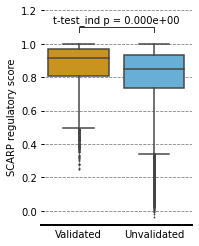

In [36]:
from statannotations.Annotator import Annotator

plt.figure(2, figsize=(3, 4))
ax2 = sns.boxplot(data=plot_data_promoter_all_peak,
                  x='pcHi-C-anno', y='SCARP regulatory score',
                  palette=['#E59F01', '#56B4E8'],
                  fliersize=1,
                  whis=2)
plt.subplots_adjust(left=0.2)
pairs = [("Validated", "Unvalidated")]
annotator = Annotator(ax2, pairs, data=plot_data_promoter_all_peak,
                      x='pcHi-C-anno', y='SCARP regulatory score')
annotator.configure(test='t-test_ind', text_format='full',
                    line_height=0.03, line_width=1, show_test_name=True)
annotator.apply_and_annotate()

ax2.tick_params(which='major', direction='in',
                length=3, width=1., bottom=False)
for spine in ["top", "left", "right"]:
    ax2.spines[spine].set_visible(False)
ax2.spines['bottom'].set_linewidth(2)
ax2.grid(axis='y', ls='--', c='gray')
ax2.set_axisbelow(True)
ax2.set_xlabel(None)
plt.savefig('./t_test.svg')

In [37]:
fpr_scarp, tpr_scarp, threshold_scarp = roc_curve(
    plot_data_promoter_all_peak['pcHi-C'],
    plot_data_promoter_all_peak['SCARP regulatory score'])
roc_auc_scarp = auc(fpr_scarp, tpr_scarp)

fpr_ori, tpr_ori, threshold_ori = roc_curve(
    plot_data_promoter_all_peak['pcHi-C'],
    plot_data_promoter_all_peak['original regulatory score'])
roc_auc_ori = auc(fpr_ori, tpr_ori)

fpr_cistopic, tpr_cistopic, threshold_cistopic = roc_curve(
    plot_data_promoter_all_peak['pcHi-C'],
    plot_data_promoter_all_peak['cisTopic regulatory score'])
roc_auc_cistopic = auc(fpr_cistopic, tpr_cistopic)

fpr_scand, tpr_scand, threshold_scand = roc_curve(
    plot_data_promoter_all_peak['pcHi-C'],
    plot_data_promoter_all_peak['scAND regulatory score'])
roc_auc_scand = auc(fpr_scand, tpr_scand)

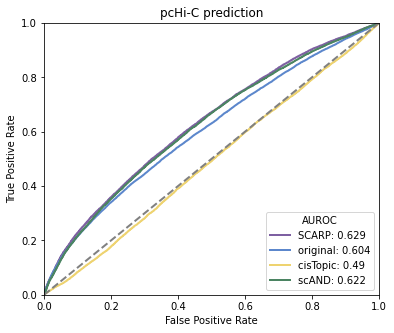

In [38]:
plt.figure(figsize=(6, 5))
plt.plot(fpr_scarp, tpr_scarp, color='#7E60A2',
         lw=2, label='SCARP: ' + str(np.around(roc_auc_scarp, 3)))
plt.plot(fpr_ori, tpr_ori, color='#5C87CC',
         lw=2, label='original: ' + str(np.around(roc_auc_ori, 3)))
plt.plot(fpr_cistopic, tpr_cistopic, color='#EED370',
         lw=2, label='cisTopic: ' + str(np.around(roc_auc_cistopic, 3)))
plt.plot(fpr_scand, tpr_scand, color='#4B8462',
         lw=2, label='scAND: ' + str(np.around(roc_auc_scand, 3)))
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('pcHi-C prediction')
plt.legend(title='AUROC', loc="lower right")
plt.savefig('./ROC.svg')
plt.show()